In [145]:
from tkinter import *
from tkinter import filedialog
from tkinter import ttk
from PIL import Image
from PIL import ImageTk
import imutils
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy import ndimage

In [146]:
#borde Exterior
def bordeExtGray(im,se):
    return (ndimage.grey_dilation(im, size = se.shape) - im)

def bordeExtD2(im,se,vble):
    if (vble==2):
        return ndimage.binary_erosion(im, structure=se) - im
    else:
        return ndimage.binary_dilation(im, structure=se) - im

#borde Interior    
def bordeIntGray(im,se):
    return (im - ndimage.grey_erosion(im, size = se.shape))

def bordeIntD2(im,se,vble):
    if (vble==2):
        return im - ndimage.binary_dilation(im, structure=se)
    else:
        return im - ndimage.binary_erosion(im, structure=se)

#Gradiente
def bGradienteGray(im,se):
    dilatacionGray = ndimage.grey_dilation(im, size = se.shape)
    erosionGray = ndimage.grey_erosion(im, size = se.shape)
    return np.subtract(dilatacionGray, erosionGray, dtype=np.float64)

def bGradienteD2(im,se,vble):
    if(vble==2):
        bDil = ndimage.binary_erosion(im, structure=se)
        bEro = ndimage.binary_dilation(im, structure=se)
        return np.subtract(bDil, bEro, dtype=np.float64)
    else:
        bDil = ndimage.binary_dilation(im, structure=se)
        bEro = ndimage.binary_erosion(im, structure=se)
        return np.subtract(bDil, bEro, dtype=np.float64)

Transformar
Transformar


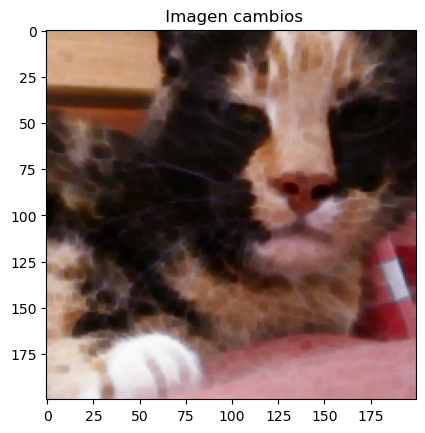

In [147]:
def es_soloBN(im_wb):
    #h,w,c = im_wb.shape
    band = False
    for i in range(im_wb.shape[0]):
        for j in range(im_wb.shape[1]):
            if np.any(im_wb[i,j]==1):
                band = True 
            elif np.any(im_wb[i,j]==0):
                band = True
            else: 
                #print(im_c[i,j])
                band = False
            break
    return band
def calculo_convolution(image1, kernel=np.ones((1,1))):
    convolved = np.zeros((np.array(image1.shape)-np.array(kernel.shape)+1))
    for x in range(convolved.shape[0]):
        for y in range(convolved.shape[1]):
            convolved[x,y] = (image1[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return convolved

def copiar():
    global imageOutput
    global image1
    
    image1 = imageOutput
    array = np.array(image1, dtype=np.float64)
    image1 = imutils.resize(array, height=480)
        
        #Para visualizar la imagen de entrada en la GUI
    imageToShow = imutils.resize(image1, width=200)
    im = Image.fromarray((imageToShow*255).astype(np.uint8))
    img = ImageTk.PhotoImage(image = im)
        
    lblInputIm1.configure(image=img)
    lblInputIm1.image = img
        
        #label imagen de entrada
    lblInfo1 = Label(root, text=f"Imagen ")
    lblInfo1.grid(column=0, row=1, padx=15, pady=15)
    image1=(imageToShow*255).astype(np.uint8)
    pass

def guardar_imagen():
    global imageOutput
    aux = combo.get()      
    im = Image.fromarray((imageOutput * 255).astype(np.uint8))
    im.save(f"{aux}_imagenOuput.png")
    
##Funcion  de RGB A YIQ
def RGB_to_YIQ(im):
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mYIQ = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mYIQ[:,:,0] = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    mYIQ[:,:,0] = np.clip(mYIQ[:,:,0], 0, 1)
    mYIQ[:,:,1] = 0.595716*im[:,:,0] + -0.274453*im[:,:,1] + -0.321263*im[:,:,2]
    mYIQ[:,:,1] = np.clip(mYIQ[:,:,1], -0.5957, 0.5957)
    mYIQ[:,:,2] = 0.211456*im[:,:,0] + -0.522591*im[:,:,1] + 0.311135*im[:,:,2]
    mYIQ[:,:,2] = np.clip(mYIQ[:,:,2], -0.5226, 0.5226)
    return mYIQ 

##Funcion  de YIQ A RGB
def YIQ_to_RGB(valoresMatriz):
    im = valoresMatriz
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mRGB = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mRGB[:,:,0] = 1*im[:,:,0] + 0.9663*im[:,:,1] + 0.6210*im[:,:,2]
    mRGB[:,:,1] = 1*im[:,:,0] + -0.2721*im[:,:,1] + -0.6474*im[:,:,2]
    mRGB[:,:,2] = 1*im[:,:,0] + -1.1070*im[:,:,1] + 1.7046*im[:,:,2]
    return mRGB

def calculo():
    global image1, imageAux, imageOutput
    variable = None
    se = np.ones((3,3),bool)
    mR=image1
    #Verifico si es imagen color o grises
    if (len(image1.shape) == 3):
        print('Transformar')
        mR=mR/255
        mR=RGB_to_YIQ(mR) # SIST YIQ
        mR1 = mR[:,:,0] # Solo banda Y 
        imageAux = mR #Matriz original en YIQ
        variable = 1
    else:
        print('No transformar')
        mR =mR/255.
        if (es_soloBN(mR)): #img BN
            if (selected.get() == 2):
                variable = 2 
            else:
                variable = 3
        else:
            variable = 4
            #img Grises
    if(combo.get() ==  'Erosion'):
        if (variable == 1):
            Result = ndimage.grey_erosion(mR1, size = se.shape)
        elif (variable == 2):
            mAux=ndimage.binary_dilation(mR, structure=se)
        elif (variable == 3):
            mAux=ndimage.binary_erosion(mR, structure=se)
        else:
            #4
            mAux = ndimage.grey_erosion(mR, size = se.shape)
            
    if(combo.get() ==  'Dilatacion'):
        if (variable == 1):
            Result = ndimage.grey_dilation(mR1, size = se.shape)
        elif (variable == 2):
            mAux=ndimage.binary_erosion(mR, structure=se)
        elif (variable == 3):
            mAux=ndimage.binary_dilation(mR, structure=se)
        else:
            #4
            mAux = ndimage.grey_dilation(mR, size = se.shape)
    
    if(combo.get() ==  'Apertura'):
        if (variable == 1):
            Result = ndimage.grey_opening(mR1, size = se.shape)
        elif (variable == 2):
            mAux=ndimage.binary_closing(mR, structure=se)
        elif (variable == 3):
            mAux=ndimage.binary_opening(mR, structure=se)
        else:
            #4
            mAux = ndimage.grey_opening(mR, size = se.shape)
    
    if(combo.get() ==  'Cierre'):
        if (variable == 1):
            Result = ndimage.grey_closing(mR1, size = se.shape)
        elif (variable == 2):
            mAux=ndimage.binary_opening(mR, structure=se)
        elif (variable == 3):
            mAux=ndimage.binary_closing(mR, structure=se)
        else:
            #4
            mAux = ndimage.grey_closing(mR, size = se.shape)
            
    if(combo.get() ==  'Borde Ext'):
        if (variable == 1):
            Result = bordeExtGray(mR1,se)
        elif (variable == 2):
            mAux = bordeExtD2(mR,se,2)
            #mAux = bordeExtD2(mR,se,2)
            #mAux = ndimage.binary_erosion(mR, structure=se)-mR
            print(mAux.shape)
        elif (variable == 3):
            mAux= bordeExtD2(mR,se,3)
        else:
            #4
            mAux = bordeExtGray(mR,se)
    
    if(combo.get() ==  'Borde Int'):
        if (variable == 1):
            Result = bordeIntGray(mR1,se)
        elif (variable == 2):
            print(variable)
            mAux= bordeIntD2(mR,se,2)
            #mAux = ndimage.binary_erosion(mR, structure=se)-mR
        elif (variable == 3):
            mAux= bordeIntD2(mR,se,3)
        else:
            #4
            mAux = bordeIntGray(mR,se)
    
    if(combo.get() ==  'Gradiente'):
        if (variable == 1):
            Result = bGradienteGray(mR1,se)
        elif (variable == 2):
            print(variable)
            mAux= bGradienteD2(mR,se,2)
            #mAux = ndimage.binary_erosion(mR, structure=se)-mR
        elif (variable == 3):
            mAux= bGradienteD2(mR,se,3)
        else:
            #4
            mAux = bGradienteGray(mR,se)

    if (variable == 1):
        mR[:,:,0] = Result
        mAux=YIQ_to_RGB(mR)
        mAux = np.clip(mAux,0,1)
    mAux1 = mAux

    plt.figure(0)
    plt.title(" Imagen cambios")
    #plt.imshow(mAux1,'gray')
    array = np.array(mAux1,dtype=np.float64)
    #print(mR.shape)
    #print(mR.dtype)
    ##array = np.clip(array,0,1)
    plt.imshow(array,'gray')
    imageOutput = array
    image = imutils.resize(array, height=480)
    imageToShow = imutils.resize(image, width=200)
    #plt.imshow(imageToShow.astype('float64'))
    #image_file = imageToShow.convert('RGB')
    #im = Image.fromarray(image_file)
    #print(imageToShow.min(), imageToShow.max())
    im = Image.fromarray((imageToShow*255).astype(np.uint8))#
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass   

def elegir_imagen():
    #Espercificar los tipos  de archivos, para elegir solo las imagenes
    path_image = filedialog.askopenfilename(filetypes = [
        ("image",".jpg"),
        ("image",".png"),
        ("image",".bmp")])
    if len(path_image)>0:
        global image1
        #leer la imagen de entrada
        image1 = imageio.imread(path_image)
        image = image1
        #image1 =image1/255.0
        
        image = imutils.resize(image, height=480)
        
        #Para visualizar la imagen de entrada en la GUI
        imageToShow = imutils.resize(image, width=200)
        im = Image.fromarray(imageToShow)
        img = ImageTk.PhotoImage(image = im)
        
        lblInputIm1.configure(image=img)
        lblInputIm1.image = img
        
        #label imagen de entrada
        lblInfo1 = Label(root, text=f"Imagen ")
        lblInfo1.grid(column=0, row=1, padx=15, pady=15)


image1 = None
imageAux = None
imageOutput = None

#Creamos la ventana principal
root = Tk()

texto = StringVar()
texto.set("Marcar radiobutton si la figura es Blanca o Negra")

root.geometry('750x500')

#Label donde se presentarala imagen de entrada
lblInputIm1 = Label(root)
lblInputIm1.grid(column=0,row=2, padx=15, pady=15)

#Label donde se presentará la imagen de salida
lblOuputIm = Label(root)
lblOuputIm.grid(column=2,row=2, padx=15, pady=15)

#LabelDeSalida
lblOutputInfo = Label(root, text="Resultado", width =25)
lblOutputInfo.grid(column=2, row=1)

#Creamos los ComboBox y la ubicacion que estos ocuparan
combo = ttk.Combobox(root)
combo.grid(column=1,row=2)

combo['values'] = ('Erosion','Dilatacion','Apertura','Cierre', 'Borde Ext', 'Borde Int', 
                   'Gradiente', 'Mediana')
combo.current(0)

#Creamos el boton para elegir la imagen de entrada 
btnIm1 = Button(root, text="ELegir imagen", width=25, command=elegir_imagen)
btnIm1.grid(column=0, row=0, padx=5, pady=5)

btnOuput = Button(root, text="Guardar imagen", width=25, command=guardar_imagen)
btnOuput.grid(column=2, row=0, padx=5, pady=5)

boton = Button(root, command=calculo, text="Filtrar",  width= 25)
boton.grid(column=1, row=9, padx=5, pady=5)

btnCopiar = Button(root, command=copiar, text="Copiar", width=25)
btnCopiar.grid(column=1,row=10, padx=5, pady=5)

btnSalir = Button(root, text="Salir", bg = '#ebaec6', width= 25, command=root.destroy)
btnSalir.grid(column=1, row=11, padx=5, pady=5)

######
etiqueta = Label(root, textvariable=texto)
etiqueta.grid(column=1, row=12, padx=5, pady=5)

selected = IntVar()
rad1 = Radiobutton(root, text='Fig-Blanco - Fondo Negro', width=25,value=1, variable=selected)
rad2 = Radiobutton(root, text='Fig-Negra - Fondo Blanco',width=25, value=2, variable=selected)
rad1.grid(column=0, row=9)
rad2.grid(column=0, row=10)

root.mainloop()